In [1]:
####################################################################################
# Code produced by Ayden McCarthy
# Manuscript Title: "Strength, Jump Height, Landing, and Mobility
#                    Characteristics Predicts High and Low Performers of a 
#                    Military Fire and Move Assessment: A Machine Learning Approach
# Program of Study: PhD Candidate
# Institution: Macquarie University
# Year: 2025
####################################################################################

####################################################################################
# Note for Users:
# This code is intended for use within Python JupyterLab.
# It requires data to be set up according to the instructions 
# outlined in the manuscript and within this script. Users can follow the code comments to 
# understand each step of the analysis.
# Please ensure that you replace the placeholder CSV file names in 
# the code with the names of your specific data files to run the code 
# successfully.
####################################################################################

In [2]:
import pandas as pd

# Load training data
# Note: Score is the fire and movement assement score for the individual. Please adjust accordingly or alternatively add your scores to this coloumn.
df = pd.read_csv("EFA_Values.csv")

# Categorise participants into 'High' (50 Laps) and 'Low' (49 laps or lower) based on Scores (or the users scores)
df['Performance_Group'] = df['Score'].apply(lambda x: 'High' if x >= 49 else 'Low')

# Reorder columns to place Performance_Group next to Score
columns_order = ['Score', 'Performance_Group'] + [col for col in df.columns if col not in ['Score', 'Performance_Group']]
df = df[columns_order]

# Sort rows by Performance_Group: High, Low
performance_order = ['High', 'Low']
df['Performance_Group'] = pd.Categorical(df['Performance_Group'], categories=performance_order, ordered=True)
df = df.sort_values('Performance_Group')

# Save the updated dataset to a new CSV file
df.to_csv("Dataset_with_Performance_Groups.csv", index=False)

# Calculate descriptive statistics for each performance group
descriptive_stats = df.groupby('Performance_Group')['Score'].describe()

# Calculate the range for each performance group
range_stats = df.groupby('Performance_Group')['Score'].apply(lambda x: x.max() - x.min()).reset_index()
range_stats.columns = ['Performance_Group', 'range']

# Merge the descriptive statistics with the range
full_stats = pd.merge(descriptive_stats, range_stats, on='Performance_Group')

# Save the statistics to a new CSV file
full_stats.to_csv("Performance_Group_Descriptive_Statistics.csv", index=False)

# Display the table
print("Descriptive Statistics for Each Performance Group:")
print(full_stats)

Descriptive Statistics for Each Performance Group:
  Performance_Group  count       mean        std   min    25%   50%   75%  \
0              High   16.0  50.000000   0.000000  50.0  50.00  50.0  50.0   
1               Low   18.0  18.944444  14.570204   1.0   3.25  20.5  30.5   

    max  range  
0  50.0      0  
1  40.0     39  


C:\Users\ayden\AppData\Local\Temp\ipykernel_2788\1121896718.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  descriptive_stats = df.groupby('Performance_Group')['Score'].describe()
C:\Users\ayden\AppData\Local\Temp\ipykernel_2788\1121896718.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_stats = df.groupby('Performance_Group')['Score'].apply(lambda x: x.max() - x.min()).reset_index()


In [ ]:
##### Note large CPU run time, if wish to reduce run time change  n_iter=2000 where desired

Best Parameters: {'activation': 'tanh', 'alpha': 0.04209014629977963, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.003338624597793332, 'max_iter': 1142, 'solver': 'sgd'}
Training Accuracy: 0.8518518518518519
Testing Accuracy: 0.8571428571428571
Training Precision: 0.8
Testing Precision: 1.0
Training Recall: 0.9230769230769231
Testing Recall: 0.6666666666666666
Training Confusion Matrix:
[[11  3]
 [ 1 12]]
Testing Confusion Matrix:
[[4 0]
 [1 2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.67      0.80         3

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7



C:\Users\ayden\AppData\Local\Temp\ipykernel_2788\123490065.py:167: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_d')


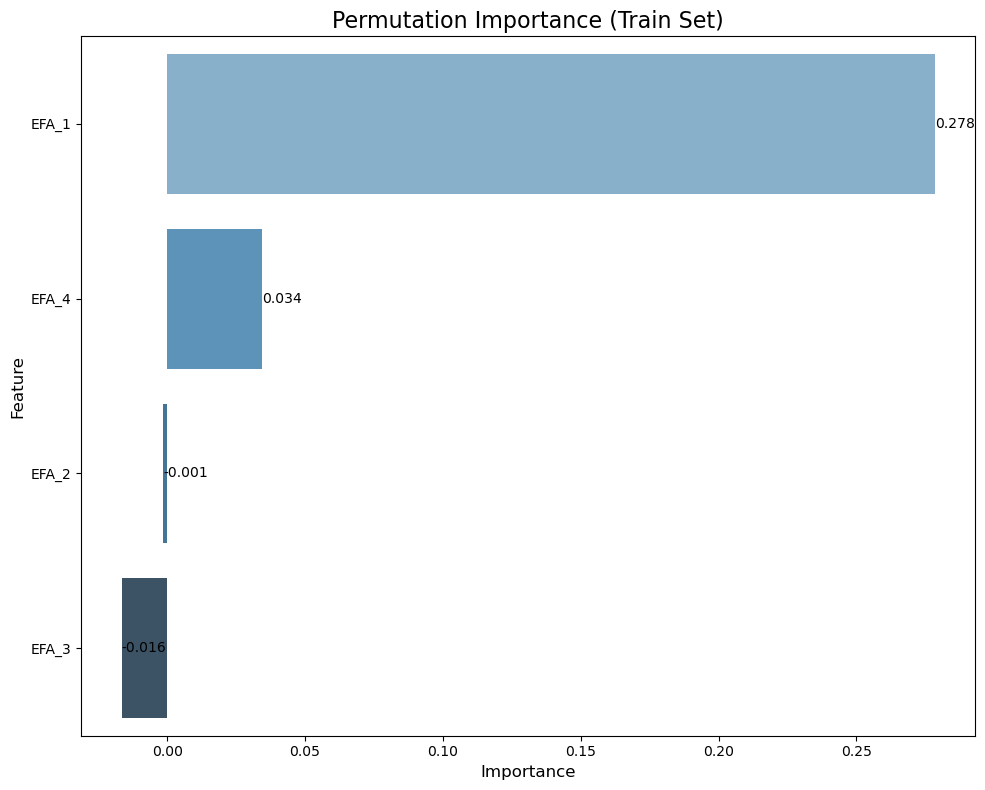

C:\Users\ayden\AppData\Local\Temp\ipykernel_2788\123490065.py:194: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=mlp_importance_df, palette='coolwarm')


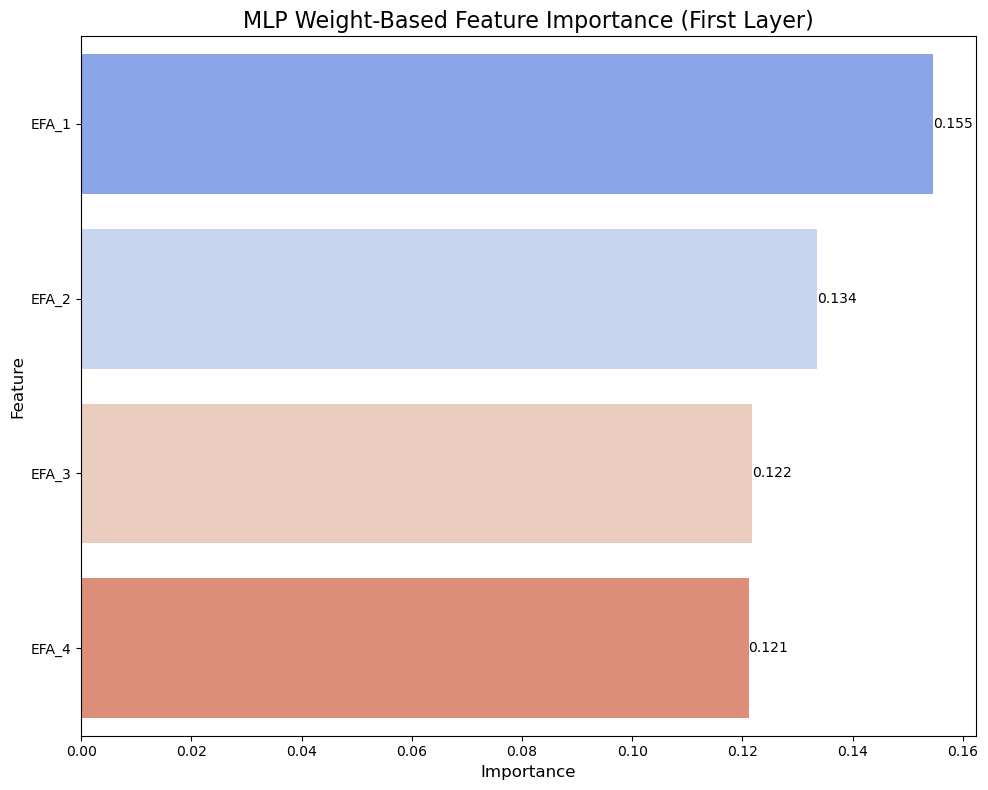

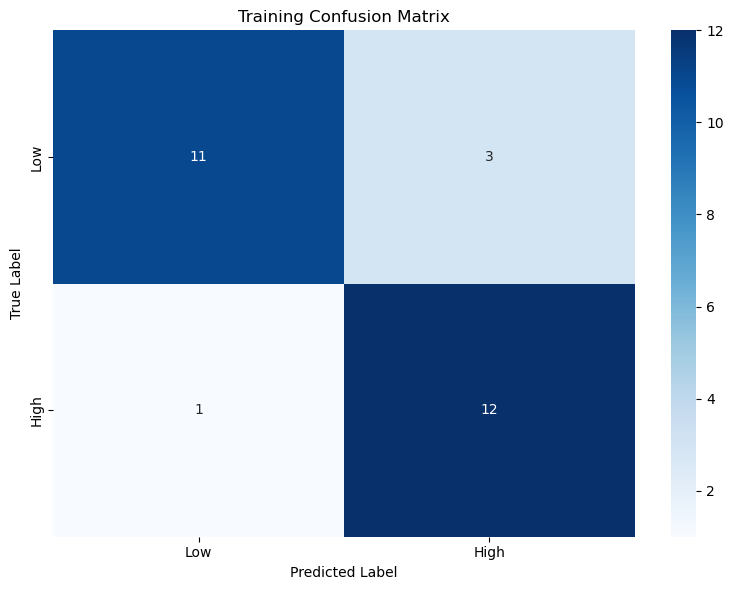

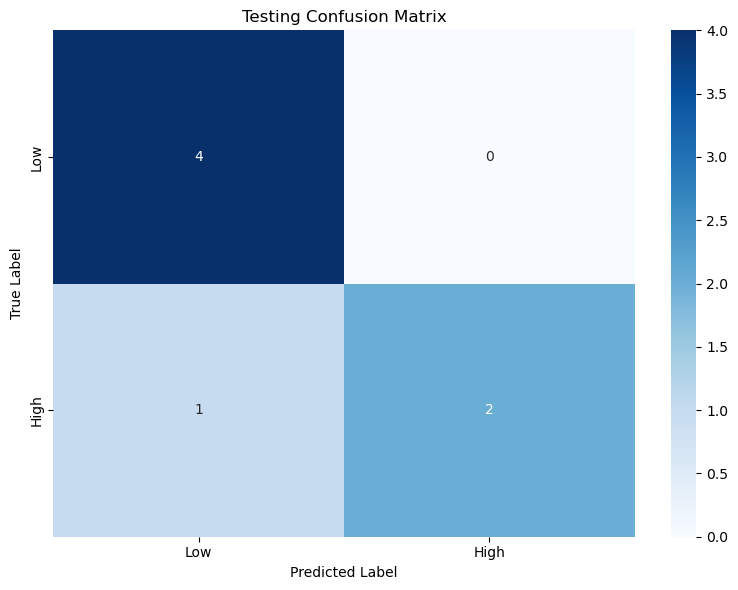

T-Test Results (Independent T-Test):
  Feature  High Mean  High Std  Low Mean   Low Std  t-statistic       p-value
0   EFA_1   0.777141  0.537859 -0.690792  0.789002     6.396517  4.560305e-07
2   EFA_3   0.443670  1.122072 -0.394373  0.939494     2.344910  2.597787e-02
1   EFA_2   0.398854  1.128783 -0.354537  0.817322     2.204950  3.614180e-02
3   EFA_4   0.357147  0.574841 -0.317464  1.173729     2.163949  4.009521e-02


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, LeaveOneOut
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats

# Load the dataset
df = pd.read_csv("EFA_Values.csv")


# Note: Please edit to the below based on your data.

# Categorise participants into 'High' and 'Low' based on  the Scores coloumn
df['Performance_Group'] = df['Score'].apply(lambda x: 'High' if x >= 49 else 'Low') #### New users need to adjust to their own criteria of high and low performers

# Reorder columns to place Performance_Group next to Score
columns_order = ['Score', 'Performance_Group'] + [col for col in df.columns if col not in ['Score', 'Performance_Group']]
df = df[columns_order]

# Encode the target variable
df['Performance_Group'] = df['Performance_Group'].map({'High': 1, 'Low': 0})

# Select features and target variable
features = df.drop(columns=['Performance_Group', 'Score'])
target = df['Performance_Group']

# Split the dataset into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=34)

# Standardise the features
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Define an MLPClassifier model
mlp = MLPClassifier(random_state=34, max_iter=2000)

# Define a parameter distribution to randomly sample from
param_dist = {
    'hidden_layer_sizes': [(50,50,50), (100,), (150,100,50), (200,100)],  # Different architectures
    'activation': ['tanh', 'relu'],  # Activation functions
    'solver': ['sgd', 'adam'],  # Optimizers
    'alpha': stats.uniform(0.0001, 0.05),  # L2 regularization parameter
    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedules
    'learning_rate_init': stats.uniform(0.001, 0.01),  # Initial learning rate
    'max_iter': stats.randint(100, 2000)  # Random integer for max_iter between 100 and 2000
}

# Set up RandomisedSearchCV with Leave-One-Out CV
random_search = RandomizedSearchCV(
    mlp,  # MLPClassifier model
    param_distributions=param_dist,  # Distributions of parameters
    n_iter=2000,  # Number of random samples to draw
    cv=LeaveOneOut(),  # Leave-One-Out cross-validation
    scoring='accuracy',  # Scoring metric
    random_state=34,  # Ensure reproducibility
    verbose=0,  # Print progress
    n_jobs=-1  # Use all cores
)

# Fit the randomised search to the training data
random_search.fit(train_features_scaled, train_target)

# Get the best model and parameters
best_model = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")

# Make predictions using the best model
train_predictions = best_model.predict(train_features_scaled)
test_predictions = best_model.predict(test_features_scaled)

# Evaluate the model
train_accuracy = accuracy_score(train_target, train_predictions)
test_accuracy = accuracy_score(test_target, test_predictions)
train_precision = precision_score(train_target, train_predictions)
test_precision = precision_score(test_target, test_predictions)
train_recall = recall_score(train_target, train_predictions)
test_recall = recall_score(test_target, test_predictions)
train_conf_matrix = confusion_matrix(train_target, train_predictions)
test_conf_matrix = confusion_matrix(test_target, test_predictions)
class_report = classification_report(test_target, test_predictions)

# Save the predictions to a .csv file including true outcome values and Score
test_features['True_Performance_Group'] = test_target.values
test_features['Predicted_Performance_Group'] = test_predictions
test_features['Score'] = df.loc[test_features.index, 'Score'].values
test_features.to_csv("Test_Set_Predictions_MLP.csv", index=False)

train_features['True_Performance_Group'] = train_target.values
train_features['Predicted_Performance_Group'] = train_predictions
train_features['Score'] = df.loc[train_features.index, 'Score'].values
train_features.to_csv("Training_Set_Predictions_MLP.csv", index=False)

# Display the results
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Testing Precision: {test_precision}")
print(f"Training Recall: {train_recall}")
print(f"Testing Recall: {test_recall}")
print("Training Confusion Matrix:")
print(train_conf_matrix)
print("Testing Confusion Matrix:")
print(test_conf_matrix)
print("Classification Report:")
print(class_report)

# Save the classification report to a text file
with open("Classification_Report_MLP.txt", "w") as f:
    f.write(f"Training Accuracy: {train_accuracy}\n")
    f.write(f"Testing Accuracy: {test_accuracy}\n")
    f.write(f"Training Precision: {train_precision}\n")
    f.write(f"Testing Precision: {test_precision}\n")
    f.write(f"Training Recall: {train_recall}\n")
    f.write(f"Testing Recall: {test_recall}\n")
    f.write("Training Confusion Matrix:\n")
    f.write(np.array2string(train_conf_matrix))
    f.write("\nTesting Confusion Matrix:\n")
    f.write(np.array2string(test_conf_matrix))
    f.write("\nClassification Report:\n")
    f.write(class_report)

# Save classification metrics and confusion matrices to CSV
metrics_data = {
    'Metric': ['Training Accuracy', 'Testing Accuracy', 'Training Precision', 'Testing Precision', 
               'Training Recall', 'Testing Recall'],
    'Value': [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
}

# Convert classification metrics into a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Save the metrics DataFrame to a CSV file
metrics_df.to_csv("Classification_Metrics_MLP.csv", index=False)

# Convert confusion matrices into DataFrame for saving to CSV
train_conf_matrix_df = pd.DataFrame(train_conf_matrix, columns=['Predicted_Low', 'Predicted_High'], index=['Actual_Low', 'Actual_High'])
test_conf_matrix_df = pd.DataFrame(test_conf_matrix, columns=['Predicted_Low', 'Predicted_High'], index=['Actual_Low', 'Actual_High'])

# Save confusion matrices to CSV
train_conf_matrix_df.to_csv("Training_Confusion_Matrix_MLP.csv")
test_conf_matrix_df.to_csv("Testing_Confusion_Matrix_MLP.csv")

# Convert classification report to DataFrame for saving to CSV
# Split classification report into a DataFrame using pandas
classification_report_df = pd.DataFrame(classification_report(test_target, test_predictions, output_dict=True)).transpose()

# Save the classification report to CSV
classification_report_df.to_csv("Classification_Report_MLP.csv", index=True)


# === Permutation Importance === #
# Compute and plot permutation importance
perm_importance = permutation_importance(best_model, train_features_scaled, train_target, n_repeats=2000, random_state=34, n_jobs=-1)

# Create a DataFrame to display the permutation importance
importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot and save permutation importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues_d')
plt.title('Permutation Importance (Train Set)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for index, value in enumerate(importance_df['Importance']):
    plt.text(value, index, f'{value:.3f}', va='center')
plt.tight_layout()
plt.savefig("Permutation_Importance_MLP.png")
plt.show()

# === Feature Importance Based on MLP Weights === #
# Extract the first hidden layer weights
mlp_weights = best_model.coefs_[0]

# Calculate absolute weights for each feature (averaging over all neurons)
mean_feature_importance = np.mean(np.abs(mlp_weights), axis=1)

# Create a DataFrame to store feature importance
mlp_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': mean_feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot and save MLP weight-based feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=mlp_importance_df, palette='coolwarm')
plt.title('MLP Weight-Based Feature Importance (First Layer)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for index, value in enumerate(mlp_importance_df['Importance']):
    plt.text(value, index, f'{value:.3f}', va='center')
plt.tight_layout()
plt.savefig("MLP_Weight_Importance.png")
plt.show()

# Plot and save training confusion matrix with numbers
plt.figure(figsize=(8, 6))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Training Confusion Matrix')
plt.tight_layout()
plt.savefig("Training_Confusion_Matrix_MLP.png")
plt.show()

# Plot and save testing confusion matrix with numbers
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Testing Confusion Matrix')
plt.tight_layout()
plt.savefig("Testing_Confusion_Matrix_MLP.png")
plt.show()


# Perform t-tests for each feature and calculate means and standard deviations
t_test_results = []
for feature in features.columns:
    high_group = df[df['Performance_Group'] == 1][feature]
    low_group = df[df['Performance_Group'] == 0][feature]
    t_stat, p_value = ttest_ind(high_group, low_group, equal_var=False)
    high_mean = high_group.mean()
    low_mean = low_group.mean()
    high_std = high_group.std()
    low_std = low_group.std()
    t_test_results.append({'Feature': feature, 'High Mean': high_mean, 'High Std': high_std, 'Low Mean': low_mean, 'Low Std': low_std, 't-statistic': t_stat, 'p-value': p_value})

t_test_results_df = pd.DataFrame(t_test_results)
t_test_results_df = t_test_results_df.sort_values(by='p-value')

# Save t-test results to a CSV file with title
t_test_results_df.to_csv("T_Test_Results.csv", index=False)

# Display t-test results
print("T-Test Results (Independent T-Test):")
print(t_test_results_df)